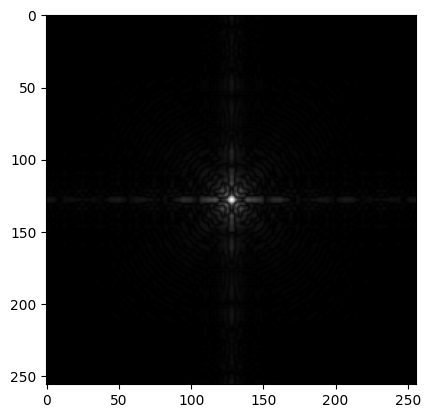

In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
image_path = r"../dip_Images/"
image = cv2.imread(image_path+r"Fig0305(a)(DFT_no_log).tif",0)
plt.imshow(image,cmap='gray')

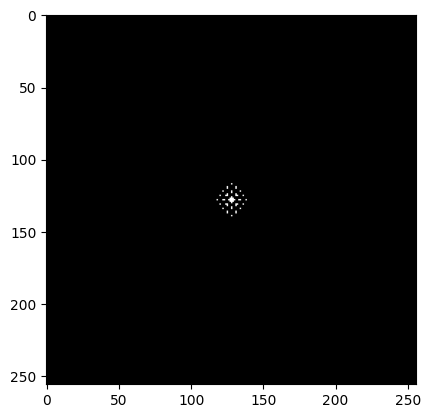

In [25]:
#Point detection
threshold = 128
max_val = 255
mask = np.array([[-1,-1,-1],
                 [-1, 8, -1],
                 [-1, -1, -1]])
convolved = cv2.filter2D(image,-1, mask)
ret , cv2_img = cv2.threshold(convolved,threshold,max_val,cv2.THRESH_BINARY)
plt.imshow(cv2_img,cmap='gray')

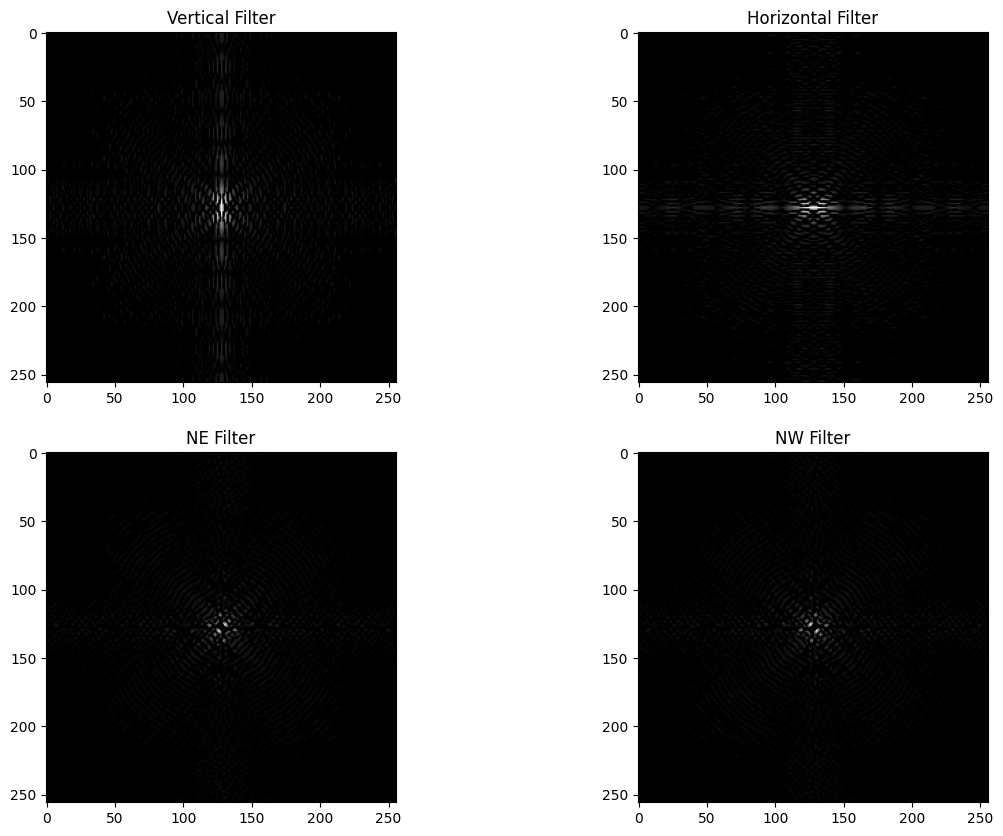

In [20]:
#line detection
vert_kernel = np.array([[-1,2,-1],
               [-1,2,-1],
               [-1,2,-1]])

horizontal_kernel = np.array([[-1,-1,-1],
                     [ 2, 2, 2],
                     [-1,-1,-1]])

ne_kernel =   np.array([[-1,-1, 2],
               [-1, 2,-1],
               [ 2,-1,-1]])

nw_kernel =   np.array([[ 2,-1,-1],
               [-1, 2,-1],
               [-1,-1, 2]])

vertical = cv2.filter2D(image,-1,vert_kernel)
horizontal = cv2.filter2D(image,-1,horizontal_kernel)
ne = cv2.filter2D(image,-1,ne_kernel)
nw = cv2.filter2D(image,-1,nw_kernel)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.imshow(vertical, cmap='gray')
plt.title('Vertical Filter')

plt.subplot(2, 2, 2)
plt.imshow(horizontal, cmap='gray')
plt.title('Horizontal Filter')

plt.subplot(2, 2, 3)
plt.imshow(ne, cmap='gray')
plt.title('NE Filter')

plt.subplot(2, 2, 4)
plt.imshow(nw, cmap='gray')
plt.title('NW Filter')

plt.show()


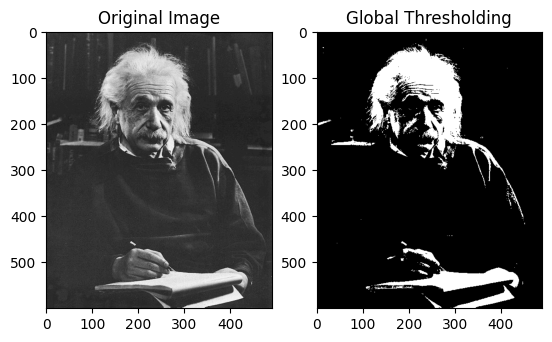

In [32]:
# Global thresholding
img = cv2.imread(image_path+r"/Fig0354(a)(einstein_orig).tif", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

delta = 3
T = 150
Tnew = np.min(img)+1

while abs(T - Tnew) >= delta:
    T = Tnew
    G1 = img[img > T]
    G2 = img[img <= T]
    
    m1 = np.mean(G1)
    m2 = np.mean(G2)

    Tnew = (m1 + m2) / 2

thresholded_img = np.where(img > Tnew, 255, 0)

# Display thresholded image
plt.subplot(1, 2, 2)
plt.imshow(thresholded_img, cmap='gray')
plt.title('Global Thresholding')

plt.show()
